# IS 4487 Module 5

## Outline

 - Identify the target variable for an analysis based on the business problem.
 - Compute the mean of a binary variable.
 - Plot a numeric (or count) variable against a categorical
    variable.
 - Calculate a count (and a proportion) for a categorical variable
    and visualize the result into a plot.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_05_megatelco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the Megatelco dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe


In [2]:
df = pd.read_csv("https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/megatelco_leave_survey.csv?raw=true")
df.describe()

income  data_overage_mb  data_leftover_mb  data_mb_used  \
count   14999.000000     14999.000000      14999.000000  14999.000000   
mean   241989.140476       153.522502         37.522035   4202.624442   
std    109603.370138       113.018111         28.046409   2202.763649   
min    -65000.000000         0.000000          0.000000    400.000000   
25%    147822.000000        54.000000         12.000000   2294.000000   
50%    241656.000000       151.000000         35.000000   4223.000000   
75%    336456.500000       242.000000         62.000000   6080.000000   
max    432000.000000       380.000000         89.000000   8000.000000   

       text_message_count         house  handset_price  \
count        14999.000000  1.499900e+04   14999.000000   
mean           135.622041  8.771616e+05     795.146810   
std             48.831061  2.870316e+05    1235.785429   
min             52.000000 -4.630000e+02     215.000000   
25%             93.000000  6.444405e+05     498.000000   
50%            135.000000  8.764130e+05     778.000000   
75%            178.000000  1.098834e+06    1064.000000   
max            220.000000  1.456389e+06  125000.000000   

       over_15mins_calls_per_month  average_call_duration            id  
count                 14996.000000           14999.000000  14999.000000  
mean                     10.568685               9.731515  11859.749517  
std                       8.402100               5.195150   6812.842446  
min                       0.000000               1.000000      2.000000  
25%                       3.000000               5.000000   6137.000000  
50%                       9.000000              10.000000  11760.000000  
75%                      17.000000              14.000000  17396.000000  
max                      35.000000              19.000000  25354.000000

## Clean up the dataset  

In [3]:
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 10000)]
df_clean.describe()

income  data_overage_mb  data_leftover_mb  data_mb_used  \
count   14993.000000     14993.000000      14993.000000  14993.000000   
mean   242025.183752       153.580804         37.524511   4202.893951   
std    109556.878020       113.002587         28.044642   2202.492183   
min     52491.000000         0.000000          0.000000    400.000000   
25%    147844.000000        54.000000         12.000000   2297.000000   
50%    241656.000000       151.000000         35.000000   4223.000000   
75%    336470.000000       242.000000         62.000000   6080.000000   
max    432000.000000       380.000000         89.000000   8000.000000   

       text_message_count         house  handset_price  \
count        14993.000000  1.499300e+04    14993.00000   
mean           135.626025  8.771541e+05      780.65057   
std             48.837544  2.869273e+05      326.59192   
min             52.000000  3.200010e+05      215.00000   
25%             93.000000  6.444950e+05      498.00000   
50%            135.000000  8.762710e+05      778.00000   
75%            178.000000  1.098785e+06     1064.00000   
max            220.000000  1.456389e+06     1350.00000   

       over_15mins_calls_per_month  average_call_duration            id  
count                 14990.000000           14993.000000  14993.000000  
mean                     10.571181               9.733676  11862.359501  
std                       8.401508               5.194211   6812.221611  
min                       0.000000               1.000000      2.000000  
25%                       3.000000               5.000000   6141.000000  
50%                       9.000000              10.000000  11765.000000  
75%                      17.000000              14.000000  17398.000000  
max                      35.000000              19.000000  25354.000000

## Calculate distribution of the outcome  

What is the proportion of people who churned?

In [4]:
df_clean[['house','leave']].groupby('leave').mean().round(2)

house
leave           
LEAVE  757607.46
STAY   995921.88

# Create basic charts

- Bar chart
- Histogram
- Box plot
- Scatter plot

<Axes: xlabel='leave'>

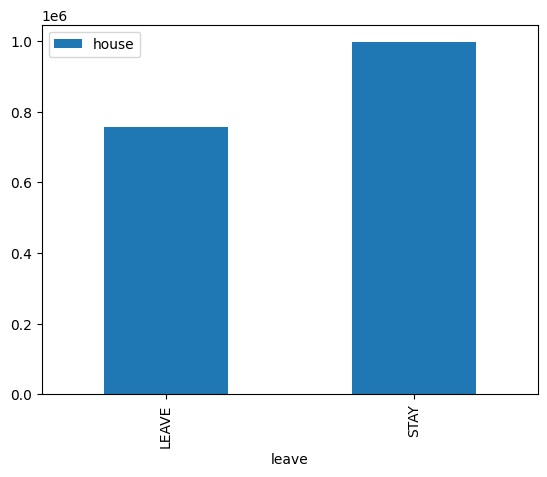

In [5]:
#Bar chart
df_clean[['house','leave']].groupby('leave').mean('house').plot.bar()


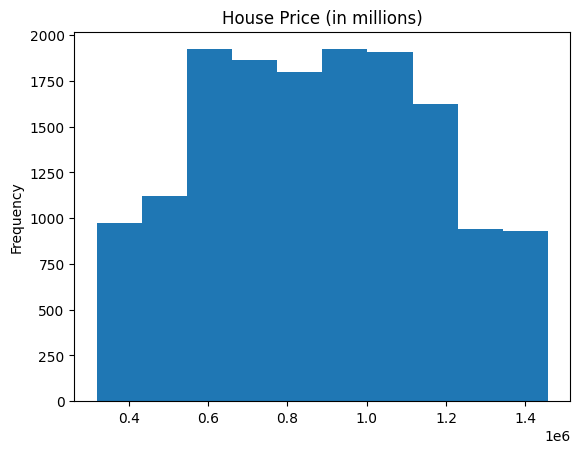

In [6]:
#Histogram
hist = df_clean['house'].plot.hist(bins=10,title='House Price (in millions)')


<Axes: title={'center': 'house'}, xlabel='[leave]'>

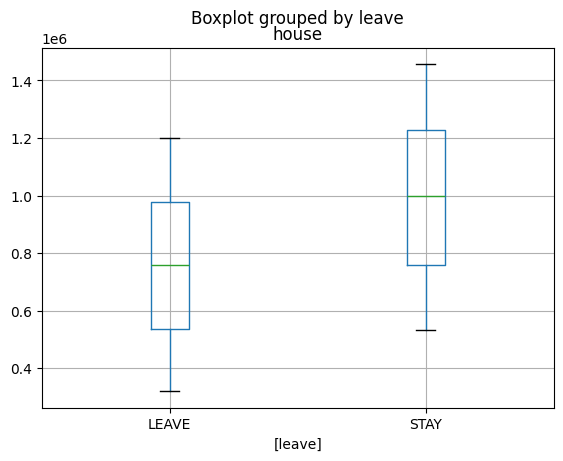

In [8]:
#Boxplot
df_clean[['leave','house']].boxplot(by='leave')

# Explore Relationships

###How does College affect leaving?

<Axes: xlabel='leave'>

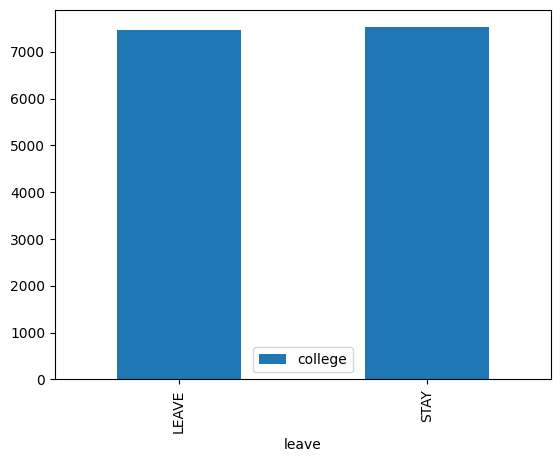

In [9]:
#Bar chart with counts
df_clean[['college','leave']].groupby('leave').count().plot.bar()

<Axes: xlabel='leave'>

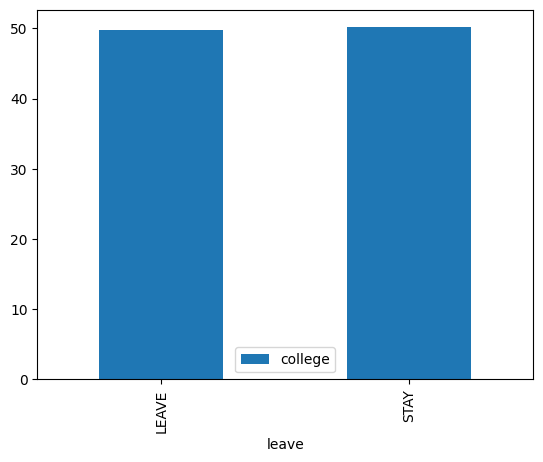

In [5]:
#Bar chart with percentage
college_summary = df_clean[['college','leave']].groupby('leave').count()

college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100
#college_summary.head()
college_summary.plot.bar()

### How does phone price affect leaving?

<Axes: xlabel='leave'>

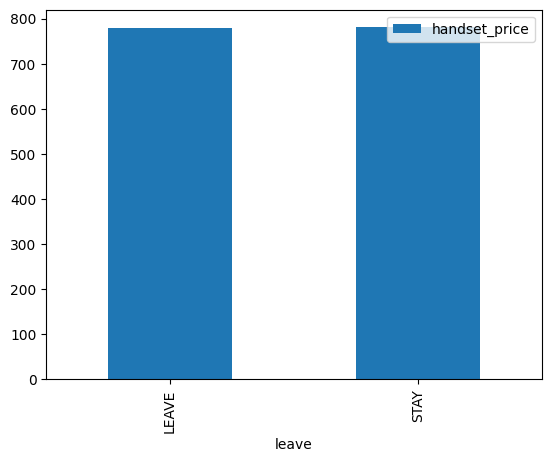

In [6]:
#Bar chart with mean price
handset_price_summary = df_clean[['handset_price','leave']].groupby('leave').mean(['handset_price'])
#handset_price_summary.head()

handset_price_summary.plot.bar()

### How about considering leaving?

<Axes: xlabel='leave'>

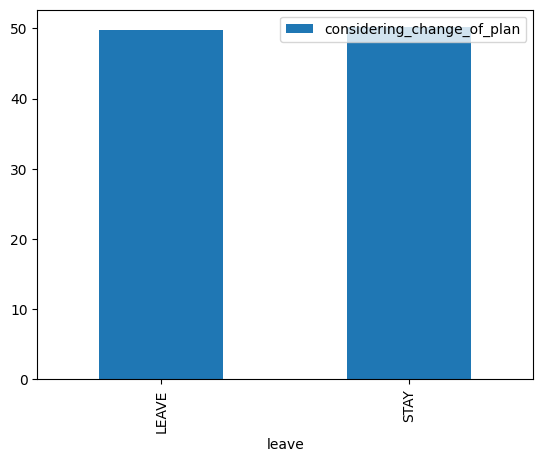

In [7]:
#Bar chart with percentage
plan = df_clean[['considering_change_of_plan','leave']].groupby('leave').count()

plan['considering_change_of_plan'] = (plan['considering_change_of_plan'] / plan['considering_change_of_plan'].sum()) * 100

plan.plot.bar()

## Create a Pair Plot
➡️ Assignment Tasks
- Import seaborn
- Create a Seaborn "pairplot" using all variables, with the color determine by "leave"
- Display the plot

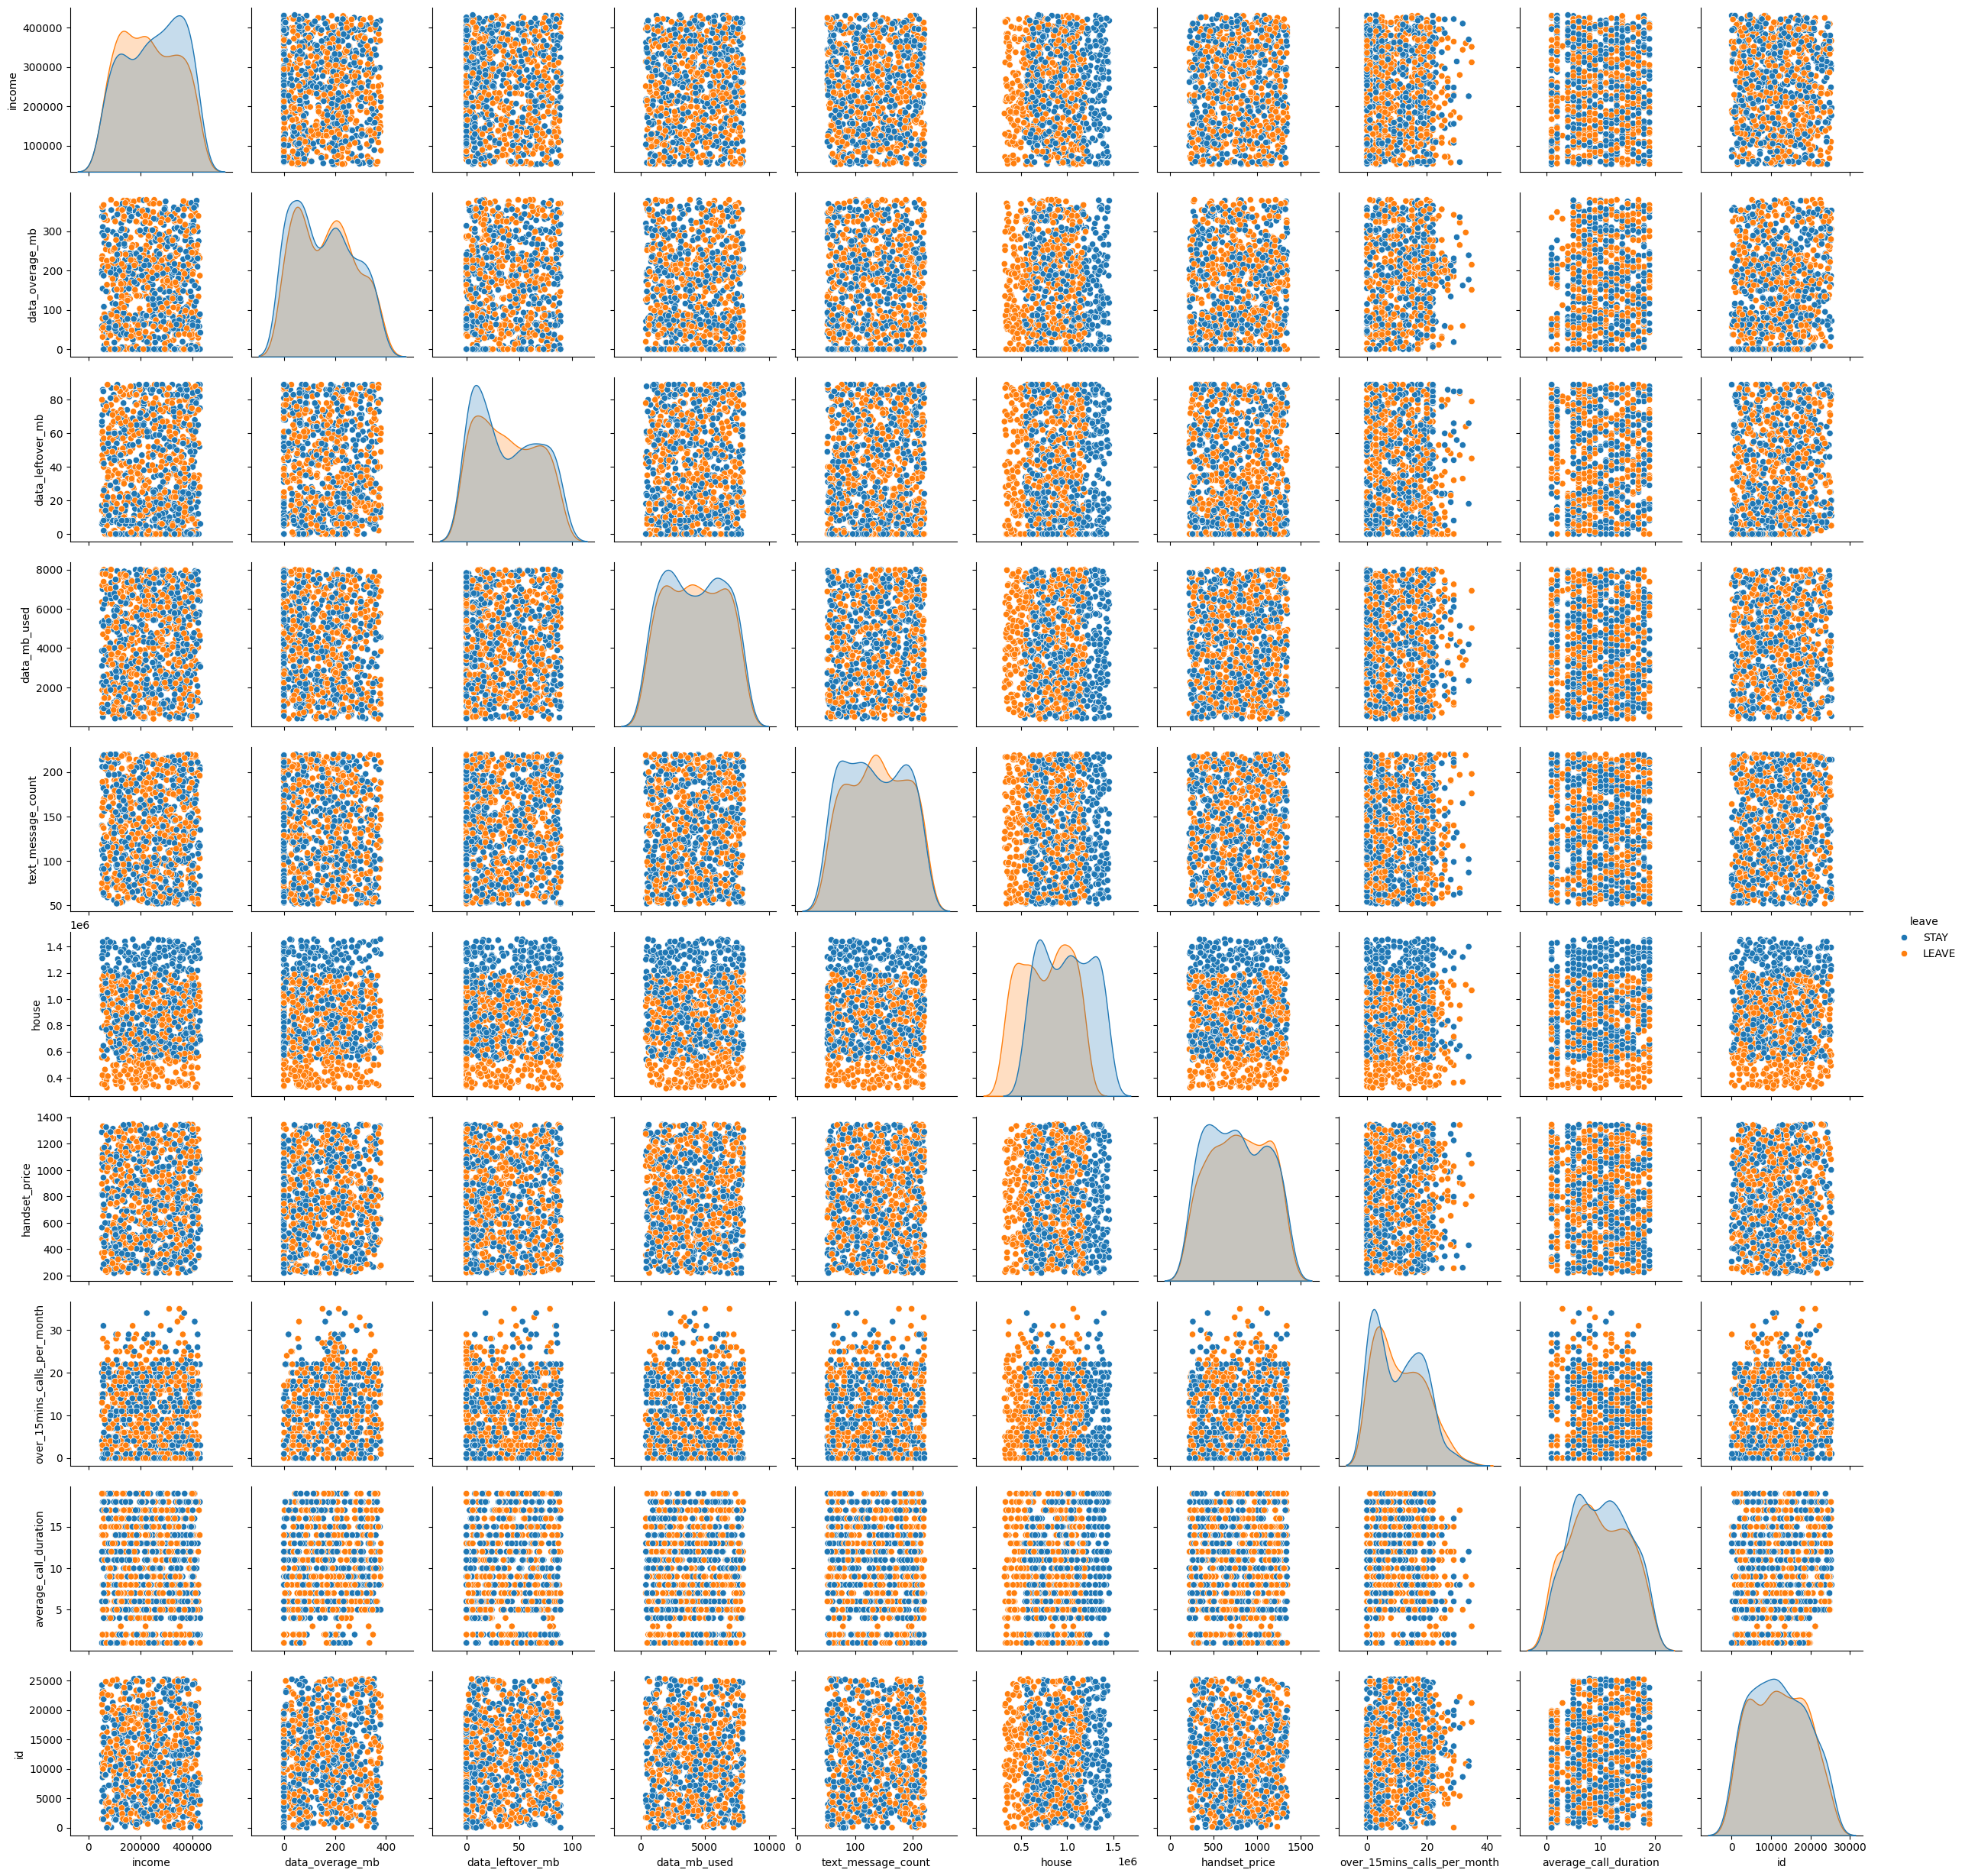

In [8]:
#pair plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_clean.sample(1000), hue='leave')
plt.show()

## Additional Cleanup

➡️ Assignment Tasks
- Remove any records with null values from the dataframe

In [9]:

df_clean = df_clean.dropna()
df_clean.head(10)

college  income  data_overage_mb  data_leftover_mb  data_mb_used  \
0     one  403137               70                 0          6605   
1    zero  129700               67                16          6028   
2    zero   69741               60                 0          1482   
3     one  377572                0                22          3005   
4    zero  382080                0                 0          1794   
5    zero  309746                0                56          2675   
6     one  325592               79                24          7300   
7     one  131230                0                 0          4489   
8     one  193667                0                 0          1023   
9     one  419573                0                74          4631   

   text_message_count    house  handset_price  over_15mins_calls_per_month  \
0                 199   841317            653                          5.0   
1                 134   476664           1193                          5.0   
2                 176   810225           1037                          3.0   
3                 184   826967           1161                          0.0   
4                  74   951896           1023                          0.0   
5                  81  1272862           1200                          5.0   
6                 190   472330           1083                          5.0   
7                  89   613744            365                          5.0   
8                  76   949829            347                          1.0   
9                 209   818027            640                          0.0   

   average_call_duration reported_satisfaction reported_usage_level  \
0                      8                   low                  low   
1                      5                   low                  low   
2                      8                   low                  low   
3                      5                   low                  low   
4                     14                   low                  low   
5                      1                   low                 high   
6                      6                   low                  avg   
7                     10                   low                 high   
8                      8                  high                  low   
9                      2                   low                  low   

  considering_change_of_plan  leave     id operating_system  
0                        yes  LEAVE   8183          Android  
1                        yes  LEAVE  12501              IOS  
2                        yes   STAY   7425              IOS  
3                         no  LEAVE  13488              IOS  
4                        yes   STAY  11389              IOS  
5                        yes   STAY  14674              IOS  
6                        yes  LEAVE  19100              IOS  
7                        yes   STAY  18170          Android  
8                         no  LEAVE   3201          Android  
9                        yes  LEAVE  12612          Android

## Summarize Data

➡️ Assignment Tasks
- Create a second set of charts that include the outlier values (house, income, price).   How do the outliers affect the values in the charts?

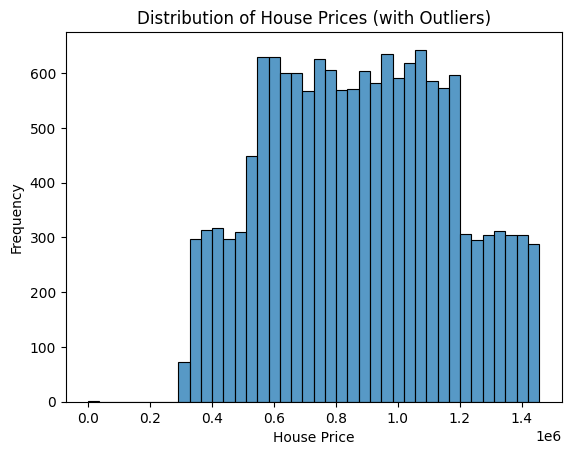

In [10]:
#house price
sns.histplot(df['house'])  # Use the original dataframe 'df' to include outliers
plt.title('Distribution of House Prices (with Outliers)')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

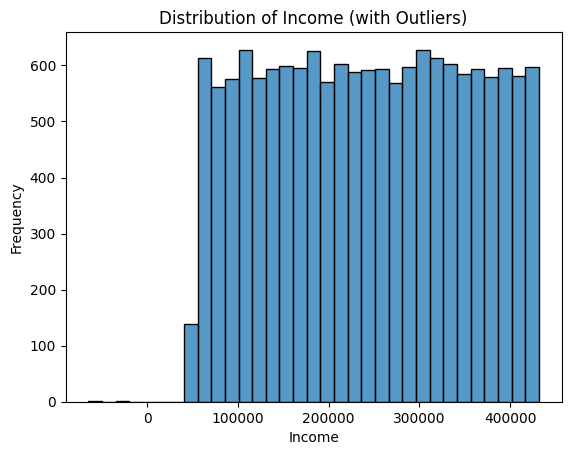

In [11]:
#income
sns.histplot(df['income'])
plt.title('Distribution of Income (with Outliers)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

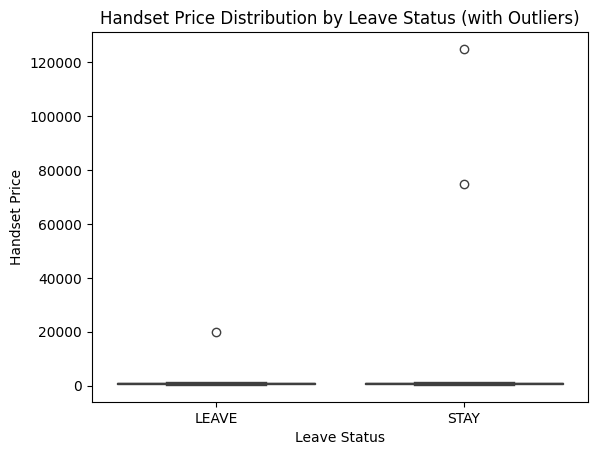

In [12]:
#price
sns.boxplot(x='leave', y='handset_price', data=df)
plt.title('Handset Price Distribution by Leave Status (with Outliers)')
plt.xlabel('Leave Status')
plt.ylabel('Handset Price')
plt.show()

## Covariance

➡️ Assignment Task
- Create a covariance matrix using all of the applicable independent variables

In [16]:
#convert "college" to num
df_clean['college'] = pd.to_numeric(df_clean['college'], errors='coerce')
#matrix
independent_vars = ['college', 'income', 'house', 'data_overage_mb', 'data_leftover_mb',
                   'data_mb_used', 'text_message_count', 'over_15mins_calls_per_month',
                   'average_call_duration', 'handset_price']
covariance_matrix = df_clean[independent_vars].cov()
print(covariance_matrix)

                             college        income         house  \
college                          NaN           NaN           NaN   
income                           NaN  1.200138e+10  1.671001e+08   
house                            NaN  1.671001e+08  8.231686e+10   
data_overage_mb                  NaN  1.100161e+04 -8.661661e+05   
data_leftover_mb                 NaN  3.014654e+04  6.703171e+04   
data_mb_used                     NaN  1.001925e+06 -2.566297e+05   
text_message_count               NaN  3.158607e+04  3.479269e+04   
over_15mins_calls_per_month      NaN -4.774906e+02 -3.146823e+04   
average_call_duration            NaN  7.453071e+03  6.798869e+03   
handset_price                    NaN  1.338752e+05  5.993818e+05   

                             data_overage_mb  data_leftover_mb  data_mb_used  \
college                                  NaN               NaN           NaN   
income                          11001.605766      30146.542522  1.001925e+06   
house      

➡️ Assignment Task
- In 100 words or less, describe what insight you can derive from the covariance matrix.  What does it tell us about the data?  

The matrix shows the relationship between the variables and how they may affect or correlate with each other. For example, we can see that the relationship between income and hosue suggests that higher income is associated with more expensive homes.
